In [1]:
import numpy as np
import scipy as sp 
import matplotlib.pyplot as plt

In [2]:
from sympy import Matrix
from sympy.printing.latex import latex

In [3]:
plt.rcParams['xtick.labelsize'] = 12  # Set x-axis tick label size
plt.rcParams['ytick.labelsize'] = 12  # Set y-axis tick label size
plt.rcParams['axes.labelsize'] = 15 # Set label size


In [4]:
def transformation_matrix(N):
    matrix = np.zeros((N, N))
    # Fill ones in the subdiagonals
    np.fill_diagonal(matrix[1:], 1)  
    np.fill_diagonal(matrix[2:], 1)  
    # Fill ones in the superdiagonal
    np.fill_diagonal(matrix[:, 1:], 1)  
    np.fill_diagonal(matrix[:, 2:], 1)  

    # Connect the first and last rows for the periodic boundary conditions
    np.fill_diagonal(matrix[:, -1:], 1)
    np.fill_diagonal(matrix[:, -2:], 1)

    np.fill_diagonal(matrix[-1:, :], 1)
    np.fill_diagonal(matrix[-2:, :], 1)


    return matrix/4 # Normalize the markov matrix 

def save_mat_to_latex(M, filename): #saves a matrix to a .tex file
    sym_M = Matrix(M)
    latex_code = latex(sym_M)

    # Write LaTeX code to a .tex file
    file_path = 'data/raw/transformation_mat/'+filename
    print(file_path)
    with open(file_path, 'w') as file:
        file.write(latex_code)


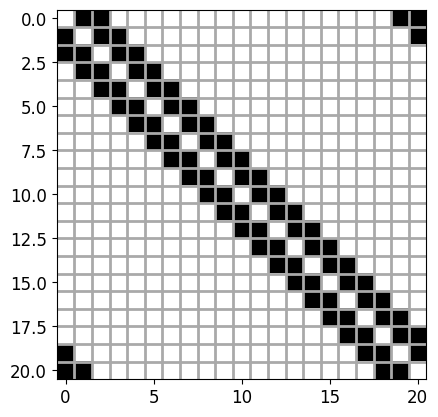

In [5]:
dim = 21 # Dimension of the matrix
T = transformation_matrix(dim)
plt.figure()
plt.imshow(T, cmap = "Greys")
for i in range(T.shape[0] - 1):
    plt.axhline(y=i + 0.5, color='darkgrey', linestyle='-', linewidth=2)

for i in range(T.shape[1] - 1):
    plt.axvline(x=i + 0.5, color='darkgrey', linestyle='-', linewidth=2)
plt.savefig('data/plots/trans_mat.png')

data/raw/transformation_mat/matrix_21x21.tex
3.637978807091714e-12


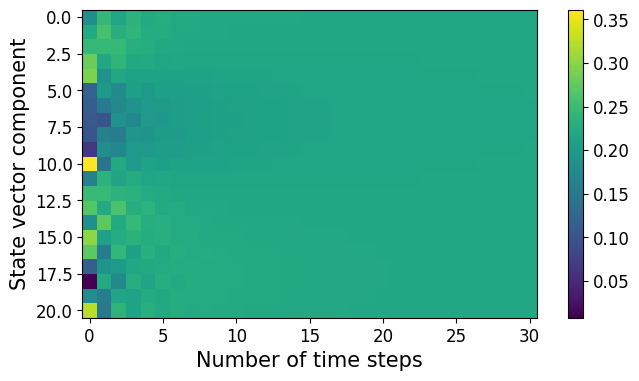

In [6]:
m = T.shape[0]
n = T.shape[1]
N = 31 #number of timesteps

save_mat_to_latex(T, 'matrix_'+str(m)+'x'+str(n)+'.tex')
print(np.linalg.det(T)) #check the determinant
t = np.linspace(0,N-1,N) #time array


V0 = np.random.rand(dim)
sol = np.zeros((dim,N))
sol[:,0] = V0/np.linalg.norm(V0)
sol[:, 0] /= np.linalg.norm(sol[:, 0]) #normalize the array

for i in range(1, N):
    sol[:, i] = np.dot(T, sol[:, i-1])
    sol[:, i] /= np.linalg.norm(sol[:, i-1])

plt.figure(figsize=(8,4))
plt.imshow(sol)
plt.xlabel("Number of time steps")
plt.ylabel("State vector component")
plt.colorbar()
plt.savefig('data/plots/time_evol1.png')

In [7]:
print('K for the simply connected matrix:', np.linalg.cond(T))

K for the simply connected matrix: 60.13587019314688


In [8]:
# Function to perform power iteration to find the largest eigenvalue and the corresponding eigenvector
def power_iteration(A, x, max_iter=10000):
    tol = 1e-9

    eigenval_prev = 0
    
    for _ in range(max_iter): 
        # Compute the updated approximation for the eigenvector 
        x = A @ x / np.linalg.norm(A @ x) 
        # Compute the updated approximation for the largest eigenvalue 
        eigenval = (x.T @ A @ x) / (x.T @ x) 
        # Check if the approximations have converged 
        if np.abs(eigenval - eigenval_prev) < tol: 
            break
        # Store the current approximation for the largest eigenvalue 
        eigenval_prev = eigenval 
    
    return eigenval, x 

# Function to perform inverse power iteration to find the smallest eigenvalue and the corresponding eigenvector
def inverse_power_iteration(A, x, max_iter=10000):
    tol = 1e-9

    A_inv = sp.linalg.inv(A)
    
    eigenval_prev = 0
    
    for _ in range(max_iter): 
        # Compute the updated approximation for the eigenvector 
        x = A_inv @ x / np.linalg.norm(A_inv @ x) 
        # Compute the updated approximation for the largest eigenvalue 
        eigenval = (x.T @ A @ x) / (x.T @ x) 
        # Check if the approximations have converged 
        if np.abs(eigenval - eigenval_prev) < tol: 
            break
        # Store the current approximation for the largest eigenvalue 
        eigenval_prev = eigenval 
    
    return eigenval, x 

x = np.random.rand(T.shape[1])

# Perform iterations
largest_eigenvalue, largest_eigenvector = power_iteration(T,x)
smallest_eigenvalue, smallest_eigenvector = inverse_power_iteration(T,x)

# Verification using linalg.eig
eigenvalues, eigenvectors = np.linalg.eig(T)
eigenvectors = eigenvectors.T
# Display results
print("Iterative Method Results:")
print("Largest Eigenvalue: {:.8f}".format(largest_eigenvalue))
print("Largest Eigenvector:", largest_eigenvector)
print("Smallest Eigenvalue: {:.8f}".format(smallest_eigenvalue))
print("Smallest Eigenvector:", smallest_eigenvector)

print("\nVerification using np.linalg.eig:")
print("Largest Eigenvalue:", eigenvalues[np.where(eigenvalues == np.max(eigenvalues))])
print("Largest Eigenvector:", eigenvectors[np.where(eigenvalues == np.max(eigenvalues))])
print("Smallest Eigenvalue:", eigenvalues[np.where(abs(eigenvalues) == np.min(abs(eigenvalues)))])
print("Smallest Eigenvector:", eigenvectors[np.where(abs(eigenvalues) == np.min(abs(eigenvalues)))])

print("\nError eps_max = ", abs((largest_eigenvalue-eigenvalues[np.where(eigenvalues == np.max(eigenvalues))])/eigenvalues[np.where(eigenvalues == np.max(eigenvalues))]))
print("\nError eps_min = ", abs((smallest_eigenvalue-eigenvalues[np.where(abs(eigenvalues) == np.min(abs(eigenvalues)))])/eigenvalues[np.where(abs(eigenvalues) == np.min(abs(eigenvalues)))]))



Iterative Method Results:
Largest Eigenvalue: 1.00000000
Largest Eigenvector: [0.21827471 0.2182745  0.21826926 0.21825946 0.21824597 0.21822998
 0.21821291 0.21819629 0.21818159 0.21817011 0.21816287 0.21816053
 0.21816328 0.21817088 0.21818266 0.21819757 0.21821429 0.21823132
 0.21824716 0.2182604  0.21826986]
Smallest Eigenvalue: -0.01662901
Smallest Eigenvector: [-0.06202131  0.10638584 -0.14837373  0.18704674 -0.22154192  0.25108859
 -0.27502565  0.29281913 -0.30407227  0.30853214 -0.30609953  0.29683023
 -0.2809296   0.2587528  -0.23079714  0.19768552 -0.16015712  0.11905222
 -0.07528785  0.0298408   0.01627211]

Verification using np.linalg.eig:
Largest Eigenvalue: [1.]
Largest Eigenvector: [[-0.21821789 -0.21821789 -0.21821789 -0.21821789 -0.21821789 -0.21821789
  -0.21821789 -0.21821789 -0.21821789 -0.21821789 -0.21821789 -0.21821789
  -0.21821789 -0.21821789 -0.21821789 -0.21821789 -0.21821789 -0.21821789
  -0.21821789 -0.21821789 -0.21821789]]
Smallest Eigenvalue: [-0.016629

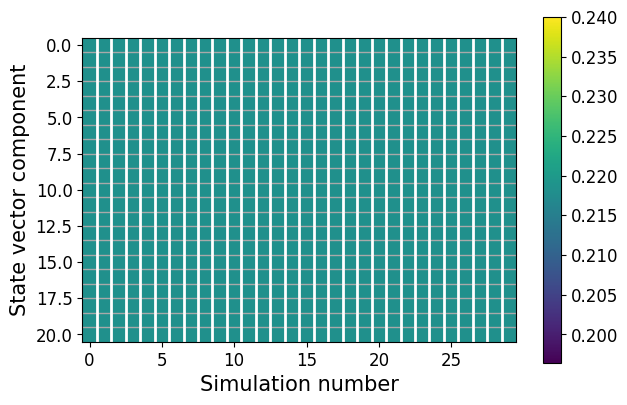

In [9]:
iter = 30 # Number of simulations to be executed
V0 = np.random.rand(dim) # Create a random initial state vector
V0 = V0/np.linalg.norm(V0) # Normalize

# Container to store the solution
sol = np.zeros((dim, iter))
sol[:, 0] = np.linalg.matrix_power(T,100) @ V0 
sol[:, 0] = np.around(sol[:, 0]/np.linalg.norm(sol[:, 0]), decimals=5)


for i in range(1, iter):
    V0 = np.random.rand(dim)
    V0 = V0/np.linalg.norm(V0)
    sol[:, i] = np.linalg.matrix_power(T,100) @ V0
    sol[:, i] = np.around(sol[:, i]/np.linalg.norm(sol[:, i]), decimals=5)

plt.figure(figsize=(7,4.5))
plt.imshow(sol)
plt.ylabel("State vector component")
plt.xlabel("Simulation number")
plt.colorbar()

#Create a grid to be able to distinguish the different vectors and elements
for i in range(sol.shape[0] - 1):
    plt.axhline(y=i + 0.5, color='darkgrey', linestyle='-', linewidth=1)

for i in range(sol.shape[1] - 1):
    plt.axvline(x=i + 0.5, color='white', linestyle='-', linewidth=2)
plt.savefig('data/plots/conv.png')


In [10]:
def is_eigenvector(v, eigenvectors, tolerance=1e-6): # Check if eigenvector 
    v_norm = v / np.linalg.norm(v)  # Normalize the test vector

    for eigenvector in eigenvectors:
        eigenvector_norm = eigenvector / np.linalg.norm(eigenvector)  # Normalize the eigenvector

        # Check if the absolute value of the dot product is close to 1
        if np.abs(np.dot(v_norm, eigenvector_norm)) > 1 - tolerance:
            return True
    
    return False

In [11]:
print(is_eigenvector(sol[:,0], eigenvectors)) # See that the state vector converges 

True


The eigenvectors of $T$ provide insight into how changes in the network's state propagate. If $T$ has a dominant eigenvalue (say $\lambda_1$), whose magnitude is larger than that of other eigenvalues, and the corresponding eigenvector $u_1$, then as $n$ grows large, $T^n$ effectively becomes dominated by $\lambda_1^n$, aligning all resulting vectors along $u_1$:
$$
\lim_{n \to \infty} T^n \approx \lambda_1^n u_1 u_1^T
$$
This expression indicates that for large $n$, the transformation $T^n$ simplifies to the outer product of $u_1$ with itself, scaled by $\lambda_1^n$, which projects any vector it transforms into the direction defined by $u_1$.


data/raw/transformation_mat/disjointed.tex


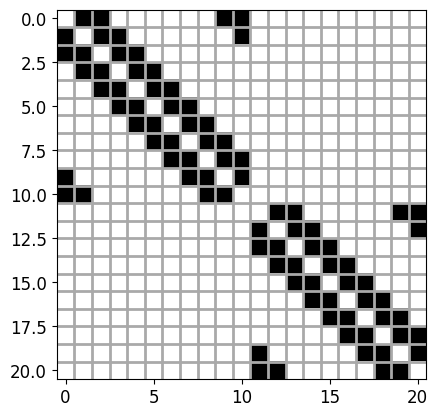

In [12]:
# Sub-network sizes
n1, n2 = 11, 10

# Create adjacency matrices for both sub-networks
A1 = transformation_matrix(n1)
A2 = transformation_matrix(n2)

# Combine into one for the entire system
A = np.block([
    [A1, np.zeros((n1, n2))],
    [np.zeros((n2, n1)), A2]
])

plt.figure()
plt.imshow(A, cmap = "Greys")
for i in range(A.shape[0] - 1):
    plt.axhline(y=i + 0.5, color='darkgrey', linestyle='-', linewidth=2)

for i in range(A.shape[1] - 1):
    plt.axvline(x=i + 0.5, color='darkgrey', linestyle='-', linewidth=2)
plt.savefig('data/plots/disj_mat.png')

save_mat_to_latex(A,'disjointed.tex')

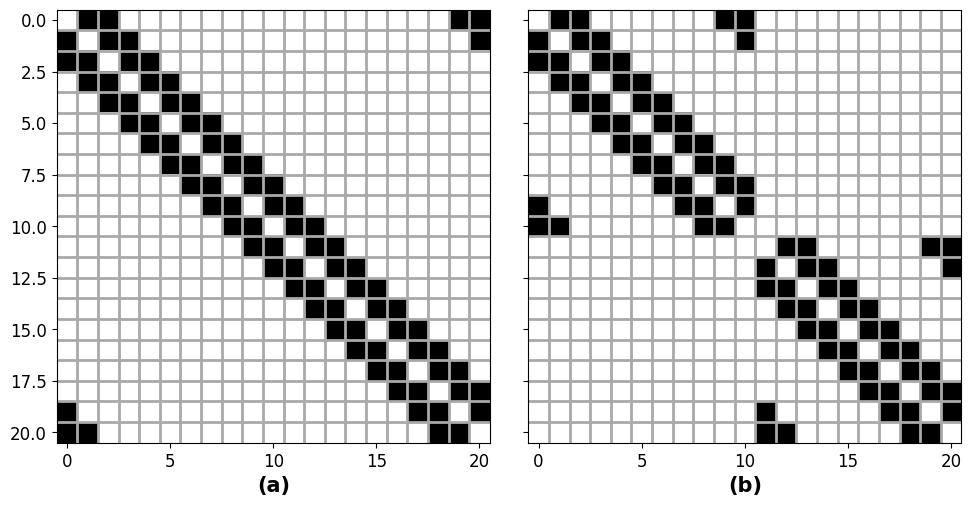

In [13]:
plt.figure(figsize=(10, 5)) 

# Plot the first subplot for the matrix T
ax1 = plt.subplot(1, 2, 1)  
ax1.imshow(T, cmap="Greys")
for i in range(T.shape[0] - 1):
    ax1.axhline(y=i + 0.5, color='darkgrey', linestyle='-', linewidth=2)
for i in range(T.shape[1] - 1):
    ax1.axvline(x=i + 0.5, color='darkgrey', linestyle='-', linewidth=2)
ax1.set_xlabel('(a)', fontweight='bold')

# Plot the second subplot for the matrix A
ax2 = plt.subplot(1, 2, 2)  
ax2.imshow(A, cmap="Greys")
ax2.set_yticklabels([]) 
for i in range(A.shape[0] - 1):
    ax2.axhline(y=i + 0.5, color='darkgrey', linestyle='-', linewidth=2)
for i in range(A.shape[1] - 1):
    ax2.axvline(x=i + 0.5, color='darkgrey', linestyle='-', linewidth=2)
plt.tight_layout()
ax2.set_xlabel('(b)', fontweight='bold')

plt.savefig('data/plots/combined_matrices.png')

plt.show()

In [14]:
# Eigenvalues using linalg.eig
eigenvalues, eigenvectors = np.linalg.eig(A)
eigenvectors = eigenvectors

# Find the largest and smallest eigenvalues
sorted_indices = np.argsort(abs(eigenvalues))
largest_eigenvalue = eigenvalues[sorted_indices[-1]]
smallest_eigenvalue = eigenvalues[sorted_indices[0]]
largest_eigenvector = eigenvectors[:, sorted_indices[-1]]
smallest_eigenvector = eigenvectors[:, sorted_indices[0]]

print("\nVerification using np.linalg.eig:")
print("Largest Eigenvalues (1), (2):", eigenvalues[sorted_indices[-1]])
print()
print("Largest Eigenvector (1):", eigenvectors[:, sorted_indices[-1]])
print("Largest Eigenvector (2):", eigenvectors[:, sorted_indices[-2]],"\n\n")

print("Smallest Eigenvalues (1):", eigenvalues[sorted_indices[1]])
print("Smallest Eigenvalues (2):", eigenvalues[sorted_indices[2]])
print()
print("Smallest Eigenvector (1):", eigenvectors[:, sorted_indices[1]])
print("Smallest Eigenvector (2):", eigenvectors[:, sorted_indices[2]])


Verification using np.linalg.eig:
Largest Eigenvalues (1), (2): 1.0000000000000009

Largest Eigenvector (1): [-0.30151134 -0.30151134 -0.30151134 -0.30151134 -0.30151134 -0.30151134
 -0.30151134 -0.30151134 -0.30151134 -0.30151134 -0.30151134  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.        ]
Largest Eigenvector (2): [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.31622777
 0.31622777 0.31622777 0.31622777 0.31622777 0.31622777 0.31622777
 0.31622777 0.31622777 0.31622777] 


Smallest Eigenvalues (1): -0.059119720391658005
Smallest Eigenvalues (2): -0.059119720391658186

Smallest Eigenvector (1): [-0.02557686 -0.09537404  0.2085983  -0.30492317  0.37654498 -0.41766135
  0.42494128 -0.397795    0.33842173 -0.25163155  0.14445568  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.        ]
Smallest Eigenvector (2): [ 0

In [15]:
print(eigenvectors)

[[-0.30151134 -0.42640143  0.02479785 -0.42640143  0.00422679  0.42640143
   0.00729082  0.41503642 -0.02557686 -0.42640143  0.02560404  0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [-0.30151134 -0.35871171 -0.20927857  0.06068325 -0.42264208 -0.27923355
   0.31743112 -0.42577525 -0.09537404 -0.17713356 -0.3765322   0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [-0.30151134 -0.17713356 -0.37691052  0.40912918  0.11606969 -0.06068325
  -0.42303717  0.40202031  0.2085983   0.27923356 -0.33843829  0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [-0.30151134  0.06068325 -0.42487604 -0.17713356  0.3896052   0.35871171
   0.23662974 -0.34569607 -0.30492317  0.40912918  0.0953475   0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [-0.30151134  0.279

K for the disjointed matrix: 4.028967658534014e+17


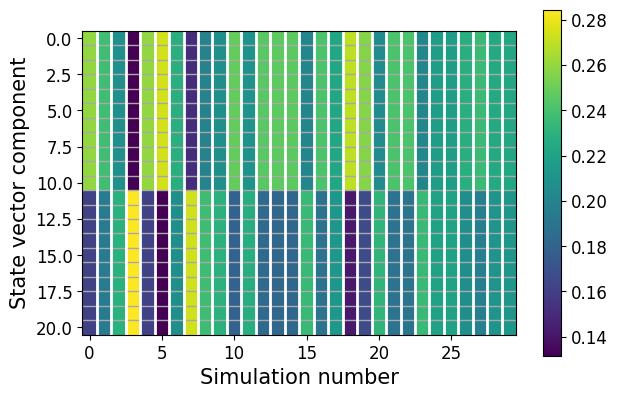

In [16]:
iter = 30
V0 = np.random.rand(dim)
V0 = V0/np.linalg.norm(V0)
sol = np.zeros((dim, iter))
sol[:, 0] = np.linalg.matrix_power(A,100) @ V0 
sol[:, 0] = sol[:, 0]/np.linalg.norm(sol[:, 0])

for i in range(1, iter):
    V0 = np.random.rand(dim)
    V0 = V0/np.linalg.norm(V0)
    sol[:, i] = np.linalg.matrix_power(A,100) @ V0
    sol[:, i] = sol[:, i]/np.linalg.norm(sol[:, i])

plt.figure(figsize=(7,4.5))
plt.imshow(sol)
plt.ylabel("State vector component")
plt.xlabel("Simulation number")
plt.colorbar()
for i in range(sol.shape[0] - 1):
    plt.axhline(y=i + 0.5, color='darkgrey', linestyle='-', linewidth=1)

for i in range(sol.shape[1] - 1):
    plt.axvline(x=i + 0.5, color='white', linestyle='-', linewidth=2)
plt.savefig('data/plots/disj_conv.png')

print('K for the disjointed matrix:', np.linalg.cond(A))

The system chooses one of the dominating eigenstates depending on the initial state.
$${\text {Relative error in output} \over \text {Relative error in input}} \leq K(\mathbf{A}) \rightarrow {\lVert \Delta x \rVert \over  {\lVert x \rVert}} \leq K(\mathbf{A}) {\lVert \Delta b \rVert \over {\lVert b \rVert}}$$  
High K number indicates ill conditioned matrix.
$$ K(\mathbf{A}) = {\lVert A^{-1} \rVert}\cdot {\lVert A \rVert}$$


In [17]:
import time
import timeit

In [18]:
def inv_solve(A,v):
    """
        Solve matrix equation Ax = v using np.linalg.inv
    Args:
        A (np.array): Matrix 
        v (np.array): right hand side vector

    Returns:
        np.array: Solution of the matrix equation
    """
    if (np.linalg.det(A)==0):
        return "Error" #return error if a matrix is not invertible 
    return np.linalg.inv(A) @ v


In [19]:
b = np.ones(dim)
for i in range(1,dim+1):
    b[i-1]/=i

# Check if detailed balance holds
b_normalized = b / np.linalg.norm(b)
detailed_balance = True

for i in range(dim):
    for j in range(dim):
        if i != j and np.abs(b_normalized[i] * T[i, j] - b_normalized[j] * T[j, i]) > 1e-12:
            detailed_balance = False
            break
    if not detailed_balance:
        break

detailed_balance, b_normalized


(False,
 array([0.79095737, 0.39547869, 0.26365246, 0.19773934, 0.15819147,
        0.13182623, 0.11299391, 0.09886967, 0.08788415, 0.07909574,
        0.07190522, 0.06591311, 0.06084287, 0.05649696, 0.05273049,
        0.04943484, 0.0465269 , 0.04394208, 0.04162934, 0.03954787,
        0.03766464]))

In [20]:
print("Finding V(t-dt)\n")

%timeit sol1 = inv_solve(T,b)

print("Solution using matrix inversion (LU decomposition):\n",inv_solve(T,b),'\n')

%timeit sol_np = np.linalg.solve(T,b)
print("Solution using np.linalg.solve:\n",np.linalg.solve(T,b),'\n')

Finding V(t-dt)

141 µs ± 1.97 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
Solution using matrix inversion (LU decomposition):
 [-4.39241309  4.89876229 -2.61858589  3.82519399 -2.99820986  1.71803346
 -2.12464156  1.9643241  -0.11271912  1.01932722 -0.41456532 -1.03703966
  0.49406792 -0.7654965   2.52479378 -1.69610776  2.234203   -3.74350028
  3.15010838 -3.46598139  5.18580499] 

84.1 µs ± 4.12 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
Solution using np.linalg.solve:
 [-4.39241309  4.89876229 -2.61858589  3.82519399 -2.99820986  1.71803346
 -2.12464156  1.9643241  -0.11271912  1.01932722 -0.41456532 -1.03703966
  0.49406792 -0.7654965   2.52479378 -1.69610776  2.234203   -3.74350028
  3.15010838 -3.46598139  5.18580499] 



In [21]:
def gauss_elim(A, b):
    """
        Solve matrix equation Ax = v using Gaussian elimintation with pivoting.
    Args:
        A (np.array): Matrix 
        b (np.array): right hand side vector

    Returns:
        np.array: Solution of the matrix equation
    """

    n = len(b)
    Ab = np.hstack([A, b.reshape(-1, 1)])
    
    # Gaussian elimination with pivoting
    for i in range(n):
        max_row = np.argmax(np.abs(Ab[i:, i])) + i
        Ab[[i, max_row]] = Ab[[max_row, i]]
        
        for j in range(i+1, n):
            ratio = Ab[j, i] / Ab[i, i]
            Ab[j, i:] -= ratio * Ab[i, i:]
    
    # Back substitution
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        x[i] = (Ab[i, -1] - np.dot(Ab[i, i+1:n], x[i+1:n])) / Ab[i, i]
    
    return x

In [22]:
%timeit sol2 = gauss_elim(T,b)
print("Solution using Gaussian elimination:\n",gauss_elim(T,b),'\n')


695 µs ± 7.52 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
Solution using Gaussian elimination:
 [-4.39241309  4.89876229 -2.61858589  3.82519399 -2.99820986  1.71803346
 -2.12464156  1.9643241  -0.11271912  1.01932722 -0.41456532 -1.03703966
  0.49406792 -0.7654965   2.52479378 -1.69610776  2.234203   -3.74350028
  3.15010838 -3.46598139  5.18580499] 



Classical iterative methods are problem because of 0 diagonals.

In [23]:
T_sparse = sp.sparse.csr_matrix(T) # Make the dense matrix sparse
%timeit sol3, exitCode = sp.sparse.linalg.minres(T_sparse, b)
sol3, exitCode= sp.sparse.linalg.minres(T_sparse, b) #solve using MINRES
print("Solution using MINRES: \n",sol3,'\n')

446 µs ± 8.79 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
Solution using MINRES: 
 [-4.39241309  4.89876229 -2.61858589  3.82519399 -2.99820986  1.71803346
 -2.12464156  1.9643241  -0.11271912  1.01932722 -0.41456532 -1.03703966
  0.49406792 -0.7654965   2.52479378 -1.69610776  2.234203   -3.74350028
  3.15010838 -3.46598139  5.18580499] 



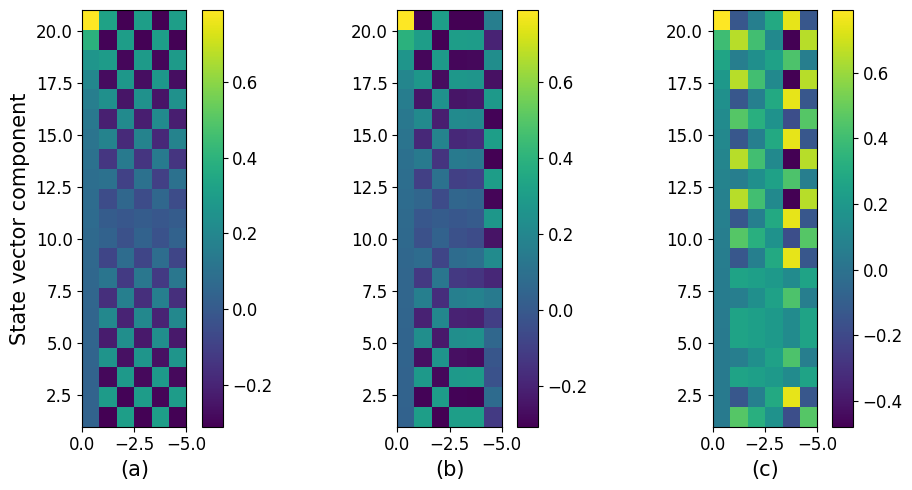

In [24]:
n = 6
sol5 = np.zeros((len(b), n))
sol5[:,0] = b/np.linalg.norm(b)
temp = T
for i in range(1,n):
    temp = T @ temp
    sol5[:,i] = np.linalg.solve(temp,b)
    sol5[:,i] /= np.linalg.norm(sol5[:,i])

plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.ylabel("State vector component")
plt.imshow(sol5, extent=[0,-5, 1,21])
plt.colorbar()
plt.xlabel('(a)')

#
# Gives "Error" det(temp) = 0 for t-5dt
#
# for i in range(1,n):
#     temp = T @ temp
#     sol5[:,i] = inv_solve(temp,b)
#     sol5[:,i] /= np.linalg.norm(sol5[:,i])
# plt.subplot(1,4,2)
# plt.xlabel('(b)')
# plt.imshow(sol5, extent=[0,-5, 1,21])
# plt.colorbar()

sol5 = np.zeros((len(b), n))
sol5[:,0] = b/np.linalg.norm(b)

for i in range(1,n):
    temp = T @ temp
    sol5[:,i] = gauss_elim(temp,b)
    sol5[:,i] /= np.linalg.norm(sol5[:,i])
plt.subplot(1,3,2)
plt.imshow(sol5, extent=[0,-5, 1,21])
plt.xlabel('(b)')
plt.colorbar()


for i in range(1,n):
    temp = T @ temp
    temp_sparse = sp.sparse.csr_matrix(temp)

    sol5[:,i] = sp.sparse.linalg.minres(temp_sparse,sol[:,i-1])[0]
    sol5[:,i] /= np.linalg.norm(sol5[:,i])
    sol5[:,i] = sp.sparse.linalg.minres(T_sparse,sol[:,i-1])[0]
plt.subplot(1,3,3)
plt.imshow(sol5, extent=[0,-5, 1,21])
plt.xlabel('(c)')

plt.colorbar()

plt.tight_layout()

plt.savefig('data/plots/reversed.png')



Does not work. Condition for reversibility of Markov Chain is presented in /data/resources/reversibility.pdf

# END  Task 2

* 3.3\) The $\nu^{Nernst}_{Cl^-}$ is slightly more negative than the membrane potential. The $Cl^-$ will flow into the cell but slowly. $Cl^-$ is negligible.    

$$\lambda^2 \frac{\partial^2 V}{\partial x^2} - \tau \frac{\partial V}{\partial t} = V(x, t)$$
$\lambda = 1$, $\tau = 1$


In [25]:
#Thomas solver from Tor Nordam Github
def tdma_solver(a, b, c, d):
    # Solves Ax = d,
    # where layout of matrix A is
    # b1 c1 ......... 0
    # a2 b2 c2 ........
    # .. a3 b3 c3 .....
    # .................
    # .............. cN-1
    # 0 ..........aN bN
    # Note index offset of a
    N = len(d)
    # Make two extra arrays to avoid overwriting input
    c_ = np.zeros(N-1)
    d_ = np.zeros(N)
    x  = np.zeros(N)
    c_[0] = c[0]/b[0]
    d_[0] = d[0]/b[0]
    for i in range(1, N-1):
        q = (b[i] - a[i-1]*c_[i-1])
        c_[i] = c[i]/q
        d_[i] = (d[i] - a[i-1]*d_[i-1])/q
    d_[N-1] = (d[N-1] - a[N-2]*d_[N-2])/(b[N-1] - a[N-2]*c_[N-2])
    x[-1] = d_[-1]
    for i in range(N-2, -1, -1):
        x[i] = d_[i] - c_[i]*x[i+1]
    return x

def tdma(A, b):
    # Solves Ax = b to find x
    # This is a wrapper function, which unpacks
    # A from a sparse array structure into separate diagonals,
    # and passes them to the numba-compiled solver defined above.
    x = tdma_solver(A.diagonal(-1), A.diagonal(0), A.diagonal(1), b)
    return x

In [26]:
def explicit_euler(init, dx, times):
    """
    Calculate the explicit Euler solution for the given parameters.

    Parameters:
        init (np.array): Initial condition.
        dx (float): Spacial step size
        times (np.array): Array with times.

    Returns:
        2D np.array: Matrix with each colum being the solution of the equation.
    """

    dims = init.shape[0]
    A = np.zeros((dims,dims))
    dt = np.abs(times[1]-times[0])

    np.fill_diagonal(A[1:, :], 1)  # First subdiagonal
    np.fill_diagonal(A[:, 1:], 1)  # First supdiagonal
    np.fill_diagonal(A[:, :], (dx**2/dt)-dx**2-2)  # Main diagonal
    A[0,1] *=2
    A[-1,-2] *=2
    A = A * dt/dx**2

    sol = np.zeros((dims, times.shape[0]))
    sol[:,0] = init
    for i in range(1,times.shape[0]):
        sol[:,i] = A @ sol[:,i-1]
    return sol

def implicit_euler(init, dx, times):
    """
    Calculate the implicit Euler solution for the given parameters.

    Parameters:
        init (np.array): Initial condition.
        dx (float): Spacial step size
        times (np.array): Array with times.

    Returns:
        2D np.array: Matrix with each colum being the solution of the equation.
    """

    dims = init.shape[0]
    A = np.zeros((dims,dims))
    dt = np.abs(times[1]-times[0])

    np.fill_diagonal(A[1:, :], -1)  # First subdiagonal
    np.fill_diagonal(A[:, 1:], -1)  # First supdiagonal
    np.fill_diagonal(A[:, :], (dx**2/dt)+dx**2+2)  # Main diagonal
    A[0,1] *=2
    A[-1,-2] *=2
    A = A * (dt/dx**2)
    sol = np.zeros((dims, times.shape[0]))
    sol[:,0] = init
    for i in range(1,times.shape[0]):
        sol[:,i] = tdma(A, sol[:,i-1])
    return sol

def crank_nicolson(init, dx, times):
    """
    Calculate the Crank-Nicolson solution for the given parameters.

    Parameters:
        init (np.array): Initial condition.
        dx (float): Spacial step size
        times (np.array): Array with times.

    Returns:
        2D np.array: Matrix with each colum being the solution of the equation.
    """

    dt = np.abs(times[1]-times[0])
    alpha = dt/dx**2

    print('alpha = ', alpha)
    dims = init.shape[0]
    A = np.zeros((dims,dims))

    np.fill_diagonal(A[1:, :], -alpha/2)  # First subdiagonal
    np.fill_diagonal(A[:, 1:], -alpha/2)  # First supdiagonal
    np.fill_diagonal(A[:, :], 1 + alpha + dt)  # Main diagonal
    A[0,1] *=2
    A[-1,-2] *=2    

    B = np.zeros((dims,dims))

    np.fill_diagonal(B[1:, :], alpha/2)  # First subdiagonal
    np.fill_diagonal(B[:, 1:], alpha/2)  # First supdiagonal
    np.fill_diagonal(B[:, :], 1 - alpha - dt)  # Main diagonal
    B[0,1] *=2
    B[-1,-2] *=2

    sol = np.zeros((dims, times.shape[0]))
    sol[:,0] = init
    for i in range(1,times.shape[0]):
        sol[:,i] = tdma(A, B@sol[:,i-1])
        sol[:,i] = sol[:,i]
    return sol


def analytical(x, t, x0=0.5, V0_hat=1):
    """
    Calculate the analytical solution for the given parameters.

    Parameters:
        x (np.array): Spatial coordinate(s).
        t (float): Time coordinate.
        x0 (float): Initial position.
        V0_hat (float): Normalization term.

    Returns:
        np.array: Value of the function V at (x, t).
    """

    # Compute the solution
    factor = V0_hat / np.sqrt(4 * np.pi * t)
    exponent = -((x - x0)**2) / (4 * t) - t
    return factor * np.exp(exponent)/np.linalg.norm(factor * np.exp(exponent))

In [27]:
def gaussian(x, mu, sigma):
    """
    Calculate the Gaussian distribution for the given mean and standard deviation.

    Parameters:
        x (np.array): Array of points where the Gaussian is evaluated.
        mu (float): Mean of the Gaussian.
        sigma (float): Standard deviation of the Gaussian.

    Returns:
        np.array: Gaussian values at each point in x.
    """
    factor = 1 / (sigma * np.sqrt(2 * np.pi))
    exponent = np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))
    
    return factor * exponent / np.linalg.norm(factor * np.exp(exponent))

$$V(x, t) = \frac{\hat{V}_0}{\sqrt{4\pi (\lambda^2 \tau) t}} \exp \left[-\frac{(x - x_0)^2}{4 (\lambda^2 \tau) t} - \frac{t}{\tau}\right]$$


alpha =  25.0
0.018021543729403997


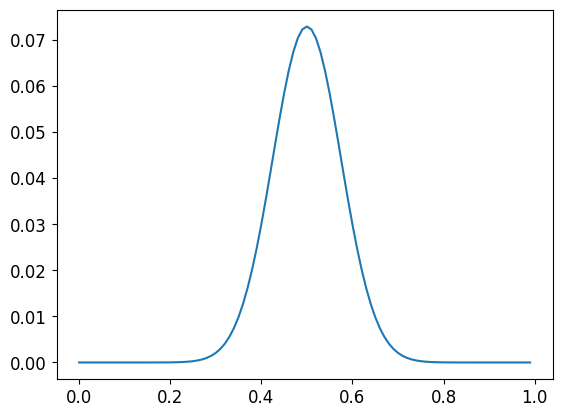

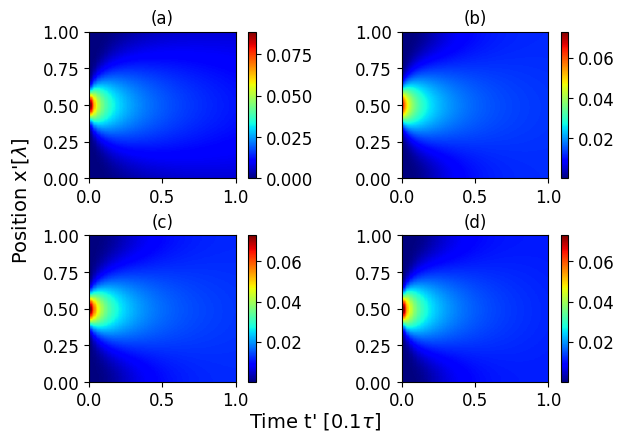

In [28]:
dx = 0.01
dt = dx**2/4
L = 1
endtime = 0.1
times = np.arange(0,endtime, dt)
x = np.arange(0,L, dx)
init = gaussian(x,0.5*L,0.075)

plt.plot(x, init)

plt.figure()

sol_explicit = explicit_euler(init,dx,times)
plt.subplot(2,2,2)
plt.title('(b)')
plt.imshow(sol_explicit,extent=[0,1,0,1], cmap='jet')
plt.colorbar()

dx = 0.01
dt = dx/4
L = 1
endtime = 0.1
times = np.arange(0,endtime, dt)
x = np.arange(0,L, dx)

init = gaussian(x,0.5*L,0.075)

solution = analytical(x[:, np.newaxis], times[1:],L/2)
plt.subplot(2,2,1)
plt.title('(a)')
plt.imshow(solution,extent=[0,1,0,1], cmap='jet')
plt.colorbar()


sol_implicit = implicit_euler(init,dx,times)
plt.subplot(2,2,3)
plt.title('(c)')
plt.imshow(sol_implicit,extent=[0,1,0,1], cmap='jet')
plt.colorbar()

sol_crank = crank_nicolson(init,dx,times)
plt.subplot(2,2,4)
plt.title('(d)')
plt.imshow(sol_crank,extent=[0,1, 0,1], cmap='jet')
plt.colorbar()
plt.tight_layout()
plt.subplots_adjust(top=0.85, bottom=0.12)
plt.figtext(0.5, 0.04, 'Time t\' [0.1$\\tau$]', ha='center', va='center',fontsize=14)
plt.figtext(0.04, 0.5, 'Position x\'[$\\lambda$]', ha='center', va='center', rotation='vertical',fontsize=14)

print(np.linalg.norm(solution[:,-1] - sol_crank[:,-1]))
plt.savefig('data/plots/cable.png')


# Task 3.7

In [29]:
def gNa(V, cutoff):
    gamma = 0.5                 # mV^-1
    V_star = -40                # Threshold potential (mV)
    res = np.zeros(len(V)) + 1/5
    res[cutoff:] += 100 / (1 + np.exp(gamma * (V_star - V[cutoff:]))) 
    return res

In [30]:
L = 2                     # Length 
T = 5.0                     # Total time (ms)
dx = 0.01                   # Spatial step
lambda_sq = 0.18**2         # mm^2
lam = 0.18                  # mm
tau = 2.0                   # ms
V_Na = 56                   # Nernst potential for Na (mV)
V_K = -76                   # Nernst potential for K (mV)
g_K = 5.0                   # Conductance for K (ohm^-1 m^-2)

# Derived parameters
dt = tau*dx**2/(2.05*lam**2)  # Time step
Nx = int(L / dx) + 1   # Number of spatial points
Nt = int(T / dt) + 1   # Number of time points
x = np.linspace(0, L, Nx)  # Spatial grid


In [31]:
def explicit_euler_step(V_old, coeff, dt, tau, V_Na, V_K, cutoff, gNa, g_K):
    """
    Explicit Euler method for the membrane potential in a neuron.

    Parameters:
    V_old (np.ndarray): The membrane potential array from the previous time step.
    coeff (float): Coefficient = lam**2 * dt / (dx**2 * tau)
    dt (float): Time step size.
    tau (float): Membrane time constant.
    V_Na (float): Nernst potential for sodium ions.
    V_K (float): Nernst potential for potassium ions.
    cutoff (float): Starting position for the sodium channels
    gNa (callable): Function that calculates the conductance for sodium channels,
                    depending on the membrane potential and the position.
    g_K (float): Conductance for potassium channels.

    Returns:
    np.ndarray: The updated membrane potential array for the current time step.
    """
    V_new = np.copy(V_old)
    V_new[1:-1] = V_old[1:-1] + coeff * (V_old[2:] - 2 * V_old[1:-1] + V_old[:-2]) - dt / tau * (gNa(V_old[1:-1], cutoff) * (V_old[1:-1] - V_Na)/g_K +  (V_old[1:-1] - V_K))
    
    # Apply Neumann boundary conditions
    V_new[0] = V_new[1]
    V_new[-1] = V_new[-2]
    
    return V_new


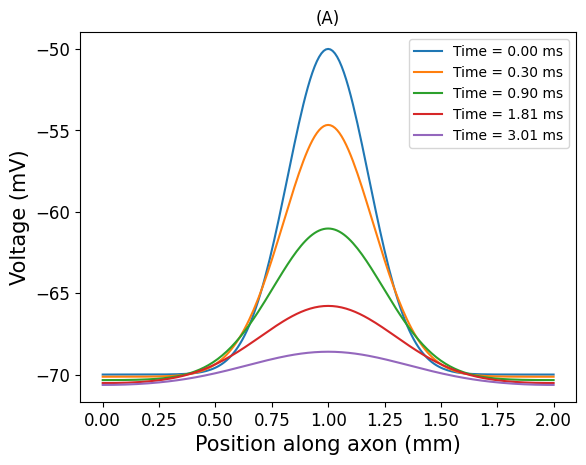

In [32]:
# Initial condition
x0 = L / 2           # Center of the initial pulse
V_app = -50        # Applied voltage at the initial pulse (mV)
V_mem = -70            # Resting membrane potential (mV)
coeff = lam**2 * dt / (dx**2 * tau)
x0 = L/2

V = (V_app - V_mem) * np.exp(-((x-x0)**2)/(2* lam**2)) + V_mem

sol1 = np.zeros((len(x), Nt))
sol1[:, 0] = V

# Time integration
for n in range(1,Nt):
    sol1[:,n] = explicit_euler_step(sol1[:, n-1], coeff, dt, tau, V_Na, V_K, 0, gNa, g_K)

plotlist = [0,100,300,600,1000]
for n in plotlist:
    plt.plot(x, sol1[:, n].T, label=f'Time = {n*dt:.2f} ms')

# Plotting results
plt.title('(A)')
plt.xlabel('Position along axon (mm)')
plt.ylabel('Voltage (mV)')
plt.legend()
plt.show()

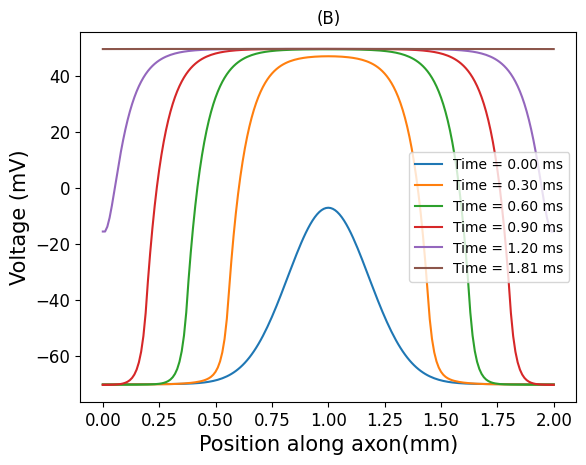

In [33]:
# Initial condition
x0 = L / 2           # Center of the initial pulse
V_app = -7        # Applied voltage at the initial pulse (mV)
V_mem = -70            # Resting membrane potential (mV)
coeff = lam**2 * dt / (dx**2 * tau)
x0 = L/2

V = (V_app - V_mem) * np.exp(-((x-x0)**2)/(2* lam**2)) + V_mem

sol2 = np.zeros((len(x), Nt))
sol2[:, 0] = V

# Time integration
for n in range(1,Nt):
    sol2[:,n] = explicit_euler_step(sol2[:, n-1], coeff, dt, tau, V_Na, V_K, 0, gNa, g_K)

plotlist = [0,100,200,300,400,600]
for n in plotlist:
    plt.plot(x, sol2[:, n].T, label=f'Time = {n*dt:.2f} ms')
# Plotting results
plt.title('(B)')
plt.xlabel('Position along axon(mm)')
plt.ylabel('Voltage (mV)')
plt.legend()
plt.show()

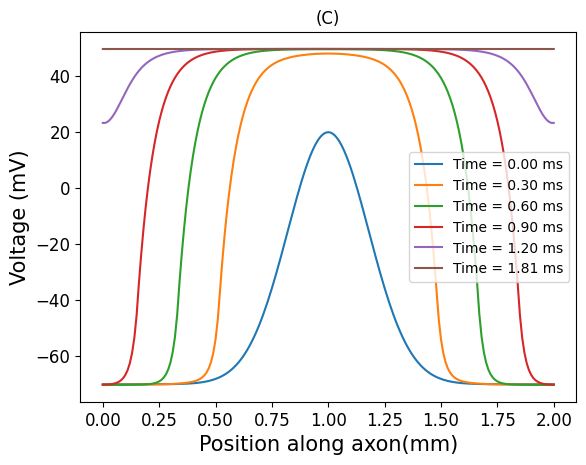

In [34]:
# Initial condition
x0 = L / 2           # Center of the initial pulse
V_app = 20        # Applied voltage at the initial pulse (mV)
V_mem = -70            # Resting membrane potential (mV)
coeff = lam**2 * dt / (dx**2 * tau)
x0 = L/2

V = (V_app - V_mem) * np.exp(-((x-x0)**2)/(2* lam**2)) + V_mem

sol3 = np.zeros((len(x), Nt))
sol3[:, 0] = V

# Time integration
for n in range(1,Nt):
    sol3[:,n] = explicit_euler_step(sol3[:, n-1], coeff, dt, tau, V_Na, V_K, 0, gNa, g_K)
plotlist = [0,100,200,300,400,600]
for n in plotlist:
    plt.plot(x, sol3[:, n].T, label=f'Time = {n*dt:.2f} ms')
# Plotting results
# Plotting results
plt.title('(C)')
plt.xlabel('Position along axon(mm)')
plt.ylabel('Voltage (mV)')
plt.legend()
plt.show()

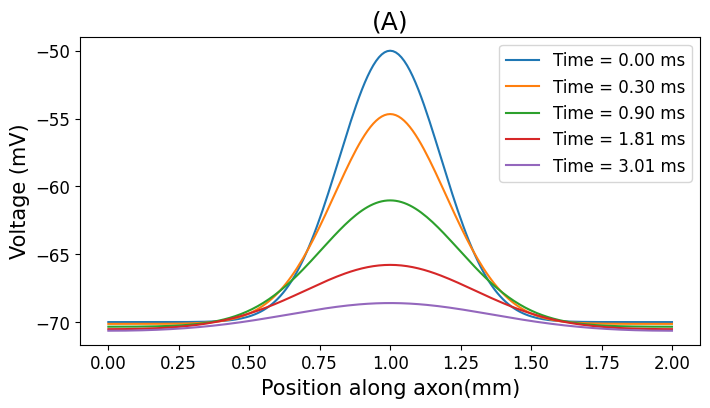

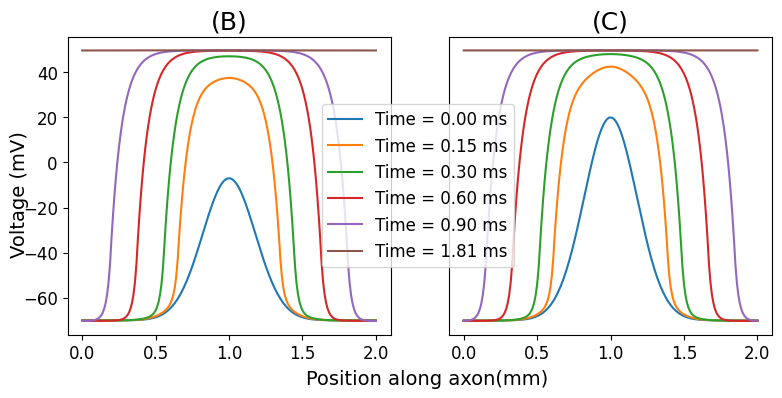

In [35]:
plt.figure(figsize=(8,4))

plotlist = [0,100,300,600,1000]
for n in plotlist:
    plt.plot(x, sol1[:, n].T, label=f'Time = {n*dt:.2f} ms')

# Plotting results
plt.title('(A)', fontsize=18)
plt.legend(fontsize =12)
plt.legend(fontsize =12)
plt.xlabel('Position along axon(mm)')
plt.ylabel('Voltage (mV)')
plt.savefig('data/plots/low_impulse.png')

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plotlist = [0,50,100,200,300,600]
for n in plotlist:
    plt.plot(x, sol2[:, n].T, label=f'Time = {n*dt:.2f} ms')
# Plotting results
# Plotting results
plt.title('(B)', fontsize=18)

ax = plt.subplot(1,2,2)
plotlist = [0,50,100,200,300,600]
for n in plotlist:
    plt.plot(x, sol3[:, n].T, label=f'Time = {n*dt:.2f} ms')
# Plotting results
# Plotting results
plt.title('(C)', fontsize=18)
plt.tight_layout()
ax.set_yticks([])  # Remove y-axis ticks

plt.legend(loc='center left', bbox_to_anchor=(-0.42, 0.5), fontsize=12)

plt.subplots_adjust(left=0.10, bottom=0.15)

plt.figtext(0.55, 0.04, 'Position along axon(mm)', ha='center', va='center',fontsize=14)
plt.figtext(0.04, 0.5, 'Voltage (mV)', ha='center', va='center', rotation='vertical',fontsize=14)

plt.savefig('data/plots/impulse.png')


0.00154320987654321


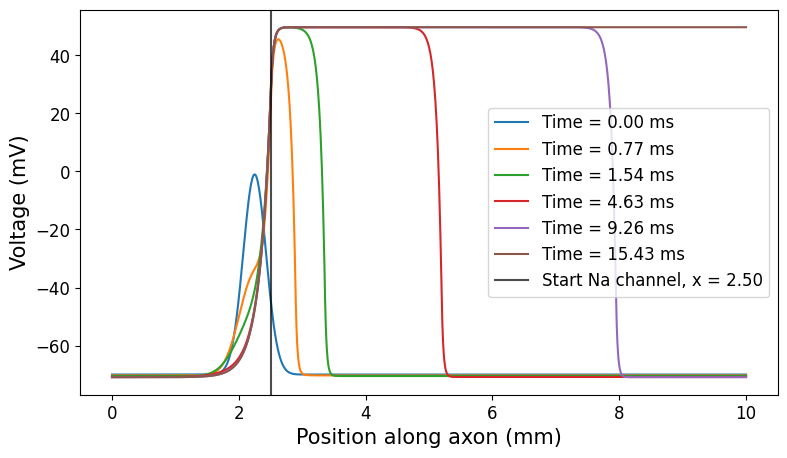

In [36]:
L = 10                      # Length 
T = 36.0                    # Total time (ms)
dx = 0.01                   # Spatial step
lambda_sq = 0.18**2         # mm^2
lam = 0.18                  # mm
tau = 2.0                   # ms
V_Na = 56                   # Nernst potential for Na (mV)
V_K = -76                   # Nernst potential for K (mV)
g_K = 5.0                   # Conductance for K (ohm^-1 m^-2)

# Derived parameters
dt = tau*dx**2/(4*lam**2)   # Time step
print(dt)
Nx = int(L / dx) + 1          # Number of spatial points
Nt = int(T / dt) + 1          # Number of time points
x = np.linspace(0, L, Nx)     # Spatial grid

# Initial condition
x0 = L/4 -0.25          # Center of the initial pulse
V_app = -1           # Applied voltage at the initial pulse (mV)
V_mem = -70            # Resting membrane potential (mV)

V = (V_app - V_mem) * np.exp(-((x-x0)**2)/(2* lam**2)) + V_mem

coeff = lam**2 * dt / (dx**2 * tau)

# Precompute constants
coeff = lambda_sq * dt / (dx**2 * tau)
sol4 = np.zeros((len(x), Nt))
sol4[:, 0] = V

# Time integration
for n in range(1,Nt):
    sol4[:,n] = explicit_euler_step(sol4[:, n-1], coeff, dt, tau, V_Na, V_K, int(Nx/4), gNa, g_K)

plotlist = [0,500,1000,3000,6000,10000]
plt.figure(figsize=(9,5))
for n in plotlist:
    plt.plot(x, sol4[:, n].T, label=f'Time = {n*dt:.2f} ms')
# Plotting results

# Plotting results
plt.xlabel('Position along axon (mm)')
plt.ylabel('Voltage (mV)')
plt.axvline(x[int(Nx/4)], label="Start Na channel, x = {:.2f}".format(x[int(Nx/4)]),c="k",alpha=0.7)
plt.savefig('data/plots/propagation.png')
plt.legend(fontsize =12)
plt.show()